### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Rescaling, Resizing, RandomFlip, RandomRotation
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

### Import data into tensorflow dataset object

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "tomato_dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


In [4]:
len(dataset)

501

In [5]:
classes=dataset.class_names
classes

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

### Visualize some of the images from the dataset

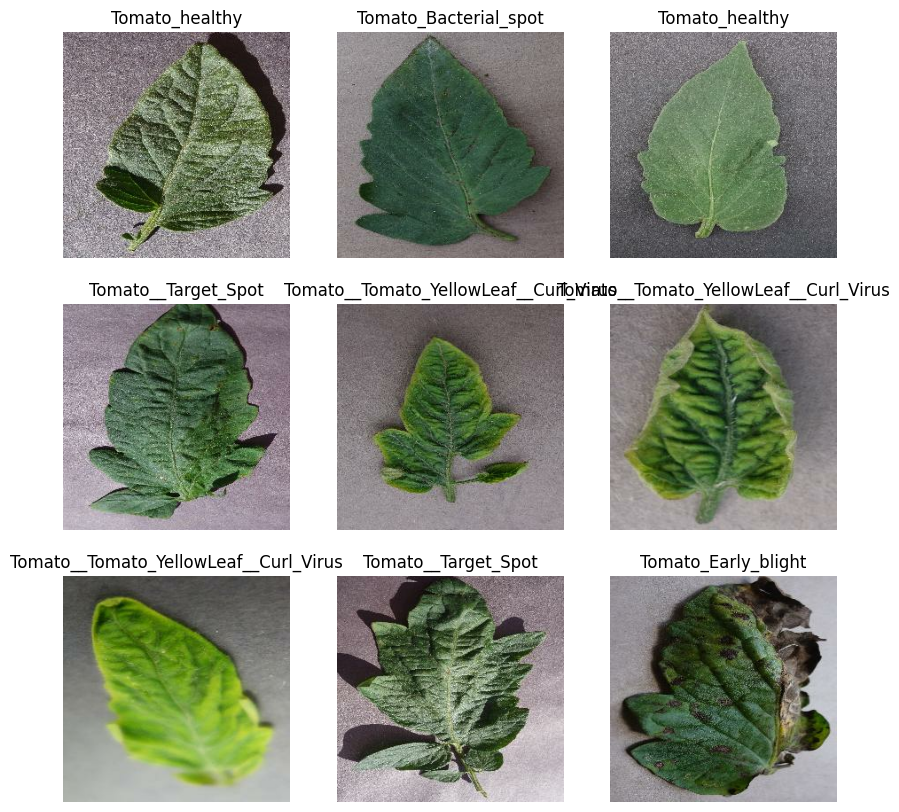

In [6]:
plt.figure(figsize=(10,10))
for image,label in dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(classes[label[i]])
        plt.axis("off")

### Function to Split Dataset into Training, Validation and Testing

In [7]:
def get_dataset_partitions(ds,train=0.8,val=0.1,test=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(ds_size*train)
    val_size=int(ds_size*val)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds
    

In [8]:

for image,label in dataset.take(1):
     print(image.shape)

(32, 256, 256, 3)


In [9]:
train_ds,val_ds,test_ds=get_dataset_partitions(dataset)

### Cache, Shuffle, and Prefetch the Dataset

In [10]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Building the Model

### Creating a Layer for Resizing and Normalization

In [11]:
resize_and_rescale=tf.keras.Sequential([
    Resizing(IMAGE_SIZE,IMAGE_SIZE),
    Rescaling(1./255)
])

### Data Augmentation

In [12]:
data_augmentation=tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2)
])

In [13]:
model=models.Sequential([
    tf.keras.Input(shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
    
])

In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,778 (3.42 MB)

 Trainable params: 896,778 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"]
)

In [17]:
history=model.fit(train_ds,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds,epochs=30)

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 825s 2s/step - accuracy: 0.7303 - loss: 0.7688 - val_accuracy: 0.6719 - val_loss: 1.1281
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 840s 2s/step - accuracy: 0.8157 - loss: 0.5328 - val_accuracy: 0.8319 - val_loss: 0.4819
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 635s 2s/step - accuracy: 0.8548 - loss: 0.4093 - val_accuracy: 0.8131 - val_loss: 0.5711
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 787s 2s/step - accuracy: 0.8784 - loss: 0.3374 - val_accuracy: 0.8706 - val_loss: 0.3704
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 2091s 5s/step - accuracy: 0.8839 - loss: 0.3333 - val_accuracy: 0.7569 - val_loss: 0.7790
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 671s 2s/step - accuracy: 0.8936 - loss: 0.3051 - val_accuracy: 0.8681 - val_loss: 0.3944
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 638s 2s/step - accuracy: 0.9221 - loss: 0.2257 - val_accuracy: 0.8356 - val_loss: 0.5081
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1471s 4s/step - accuracy: 0.9239 - loss: 0.2194 - val_ac

In [18]:
model.evaluate(test_ds)

51/51 ━━━━━━━━━━━━━━━━━━━━ 494s 656ms/step - accuracy: 0.9761 - loss: 0.0631


[0.06895546615123749, 0.9779411554336548]

### Run prediction on a sample image

actual label
Tomato_Septoria_leaf_spot
predicted label:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Tomato_Septoria_leaf_spot


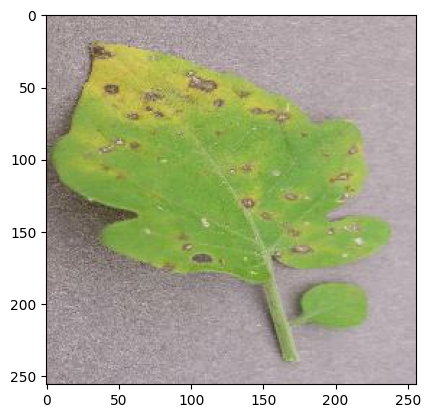

In [19]:
for image,label in test_ds.take(1):
    plt.imshow(image[0].numpy().astype("uint8"))
    print("actual label")
    print(classes[label[0].numpy()])
    print("predicted label:")
    prediction=model.predict(image)
    print(classes[np.argmax(prediction[0])])

### Saving the Model

In [ ]:
model.save("../tomatoes.h5")